###    Classification d'images
   

1. Construction d'un data pipeline
2. Pour le deep learning : preprocession d'images
3. Creation d'un CNN pour le classification avec keras et tensorflow
4. Evaluation de la performance du modèle
5. Enregister le modèle pour le déploiement

# 1. Setup and Load data

### 1.1 Importation des modules et librairies

In [66]:
#tensorflow tensorflow-gpu : pipeline  __ open-cv : clean images pas top __matplotlib pour visualisation
# installation sur invite de commandes
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
async-generator              1.10
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
bs4                          0.0.1
cachetools                   5.2.1
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
click                        8.1.3
colorama                     0.4.5
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
exceptiongroup               1.0.0rc9
executing                    1.1.1
fa


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
#os : navigation à traver les fichiers
import tensorflow as tf ##
import os

In [72]:
print(tf.version.VERSION)


2.10.1


gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: #limiter l'utilisation du GPU
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Enlever les images de mauvaises qualités

In [73]:
import cv2 #
import imghdr # verifie les extensions des fichiers

In [74]:
data_dir='data/seg_train'

In [75]:
train_list_dir = os.listdir(data_dir) #listes des dossiers contenus dans le dossier d'entrainement

In [76]:
train_list_dir #test pour voir si ça lit 

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [77]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [78]:
#à enlever
for image_class in train_list_dir :
    print(image_class)
    

buildings
forest
glacier
mountain
sea
street


In [79]:
# TEST avec try / except : est ce avec une extension image ? est ce une image ?
for image_class in train_list_dir : #looping inside every folder
    for image in os.listdir(os.path.join(data_dir, image_class)):#looping inside every image and tell in whicj folder the image is 
        image_path = os.path.join(data_dir, image_class,image) #grab every single image 
        try :
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts :
                print(f"Image not in ext list{image_path}") #utilisation du f string à instead of format
                os.remove(image_path)
        except Expection as e : 
            print(f"Issue with image{image_path}")


### 1.3 Charger les données avec Keras Utils

In [80]:
#Tensorflow's dataset API : allows to scale out to much larger datasets, gives a repatable set of steps
# ici, on utilise un module de keras
tf.data.Dataset.list_files


<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [81]:
import numpy as np
from matplotlib import pyplot as plt

Construire un data pipeline

In [82]:
#builds an image dataset, resize images => must have for classification mmodels
# store the dataset into a folderor a variable called "data", so we can take a look at the data itself
#builds the data pipeline
# reshape the images image_dataset_from_directoryso they have the consistent size
#batches them up into a batch size of 32
data = tf.keras.utils.image_dataset_from_directory('data/seg_train')

Found 14034 files belonging to 6 classes.


Avoir accès au data pipeline

In [98]:
#grab the data that we want to use on the generator, so we convert the data into a numpy iterator
#allowing us to loop through the data pipeline [time : 27:33]
data_iterator = data.as_numpy_iterator()

In [99]:
#get consecutive batches using the ".next()", grabbing one batch back 27:44 
#what is a batch of data 28:41
batch = data_iterator.next()

____________APARTE : what is a batch : images representation and  labels___________________

In [100]:
# aparte : what is a batch 
len(batch)  




2

2 : there's 2 parts in this dataset: 
images representation (from the directory into memory as a set of numpy arrays)



In [101]:
batch[0].shape #(32, 256, 256,3) based on image_dataset_from_directory
# 32 because the batch's size is 32 images [time 30:33]
#256,  256  : image's shape
#3 : on 3 channels, on tensorflow : RGB !! for opencv, it's going to be BGR
# if want to change batch size to 8 and image size to 128² for example, see documentation 
#code :  tf.keras.utils.image_dataset_from_directory('data', batch_size = 8, image_size = (128, 128))

(32, 256, 256, 3)


then labels : to which "folder" the batch's element belongs to

In [102]:
batch[0] #[time 31:00]

array([[[[6.70000000e+01, 8.90000000e+01, 1.40000000e+01],
         [6.43476562e+01, 8.63476562e+01, 1.13476562e+01],
         [6.02460938e+01, 8.22460938e+01, 7.24609375e+00],
         ...,
         [2.19046875e+02, 2.23011719e+02, 2.22292969e+02],
         [1.69828125e+02, 1.73207031e+02, 1.77175781e+02],
         [1.38000000e+02, 1.41000000e+02, 1.48000000e+02]],

        [[5.94218750e+01, 8.10429688e+01, 9.83203125e+00],
         [6.35173187e+01, 8.49948425e+01, 1.40710449e+01],
         [6.98504791e+01, 9.11059875e+01, 2.06262207e+01],
         ...,
         [2.07656006e+02, 2.12757568e+02, 2.05597412e+02],
         [1.83302979e+02, 1.87818604e+02, 1.85345947e+02],
         [1.67554688e+02, 1.71691406e+02, 1.72250000e+02]],

        [[4.77031250e+01, 6.87382812e+01, 3.38671875e+00],
         [6.22332916e+01, 8.29028625e+01, 1.82824707e+01],
         [8.47026215e+01, 1.04806854e+02, 4.13171387e+01],
         ...,
         [1.90041260e+02, 1.96900635e+02, 1.79779541e+02],
         [

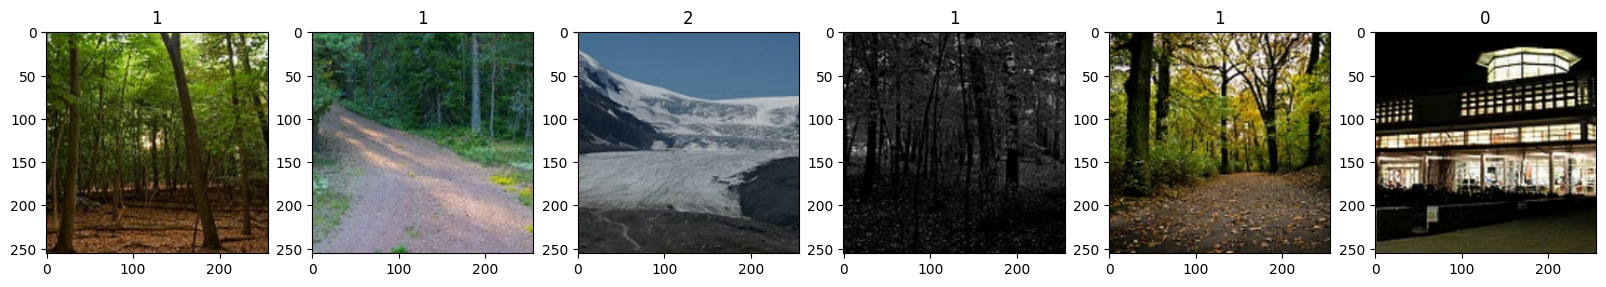

In [104]:
#voir une partie du batch
fig, ax = plt.subplots(ncols = 6, figsize = (20,20)) #nb de colonne disponibles pour l'affichage
for idx, img in enumerate(batch[0][:6]):#nb d'images à afficher
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Après avoir run plusieurs fois batch = data_iterator.next() et batch[1] : je constate que les images sont reparties selon les classes 

0. : building (confusion avec street)
1. : forest (confusion avec mountain)
2. : glaciers (confusion avec mountain)
3. : mountain
4. : sea : 100% 
5. : street

_______________fin de l'aparte________________

# 2. Pour le deep learning : Preprocess Data

Mettre les valeurs d'images entre 0 et 1, au lieu de 0 à 255 : aide le deep learning model à générer plus rapidement et produire de meilleurs résultats

(déjà fait ici avec ce kaggle) On va séparer nos données entre entrainement, test et validation  pour éviter l'overfit

### 2.1 Scale Data

On tensorflow, the 3 channels are 255 shades  x RGB.

On opencv, pour optimiser le calcul, on va diviser les shades de couleurs (plus un nombre est petit, et moins il est lourd à calculer ?). De plus, avec opencv, on passe de RGB à BGR

In [33]:
#scaled_image = batch[0] / 255 #pour avoir des valeurs de 0 à 1

Attention : on utilise un data pipeline donc on ne peut pas nécessairement aller et faire cette mise à l'échelle à chaque fois qu'on charge un batch.

Ce qu'on veut faire, pour le faire de façon efficace, et de simplement faire cette mise à l'échelle  à chaque fois qu'on charge dans la data avec la pipeline, en utilisant la capacité du pipeline

In [105]:
# on utilise map() pour transformer la data dans le data pipeline, avant qu'elle nesoit utilisée : 
# on accélère la vitesse d'accès à la data  time 36:23
#la fonction lamdba  pour faire cette transformation ; 
#x représente les images car ce sont nos features indépendantes donc nous allons les "passing in"
# y est la variable target
scaled_data = data.map(lambda x, y: (x / 255, y))


Quand on a accès à notre batch, on a accès à nos images et à nos labels

In [106]:
scaled_iterator = data.as_numpy_iterator() # ici, on a un générateur aléatoir du batch c'est pourquoi les valeurs changent

In [107]:
batch = scaled_iterator.next()
batch


(array([[[[9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          [9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          [9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          ...,
          [1.55894531e+02, 1.53894531e+02, 1.93894531e+02],
          [1.54136719e+02, 1.52136719e+02, 1.92136719e+02],
          [1.53000000e+02, 1.51000000e+02, 1.91000000e+02]],
 
         [[9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          [9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          [9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          ...,
          [1.55528946e+02, 1.53528946e+02, 1.93528946e+02],
          [1.53993149e+02, 1.51993149e+02, 1.91993149e+02],
          [1.53000000e+02, 1.51000000e+02, 1.91000000e+02]],
 
         [[9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          [9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          [9.60000000e+01, 9.40000000e+01, 1.43000000e+02],
          ...,
          [1.54963608e+02, 1.52963608e+02, 1.9296

In [108]:
batch[0].max()

255.0

In [109]:
batch[0].min()

0.0

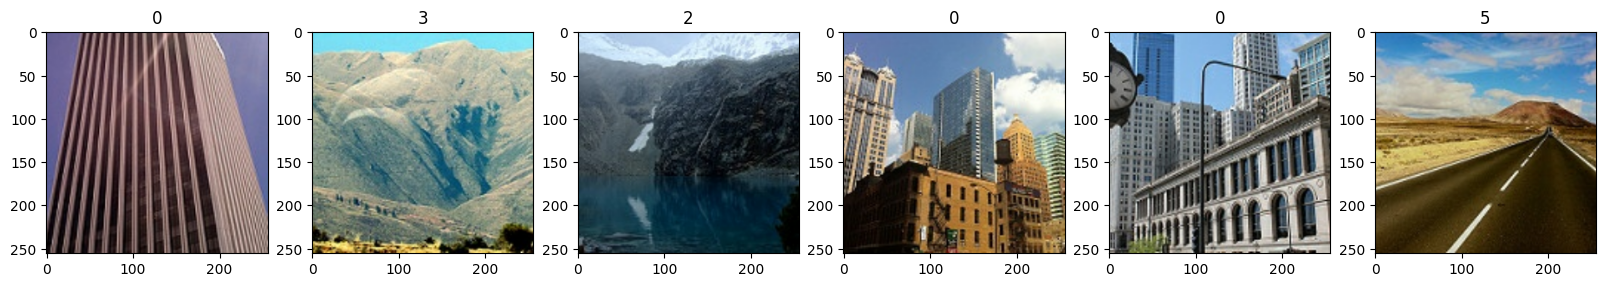

In [111]:
#voir une partie du batch
fig, ax = plt.subplots(ncols = 6, figsize = (20,20)) #nb de colonne disponibles pour l'affichage
for idx, img in enumerate(batch[0][:6]):#nb d'images à afficher
    ax[idx].imshow(img.astype(int))#comme on divise les images par 255, on avait avant des integers
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data into training and testing partition (pas nécessaire ici, les splits sont déjà fait)

In [40]:
from keras.preprocessing.image import ImageDataGenerator

In [41]:
#len(data)

In [42]:
#train_size = int(len(data)*.8)
#test_size =  int(len(data)*.2)

In [43]:
#train_size+test_size

In [112]:
pixel_len = 256

In [113]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('data/seg_train',
                                                 target_size = (pixel_len, pixel_len),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [114]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_set = test_datagen.flow_from_directory('data/seg_test',
                                                 target_size = (pixel_len, pixel_len),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


# 3. Deep Model

## 3.1  Build Deep Learning Model with Keras

In [126]:
cnn = tf.keras.models.Sequential()

In [127]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[pixel_len, pixel_len, 3], strides=1))

In [128]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [129]:
cnn.add(tf.keras.layers.Flatten())

In [130]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [131]:
cnn.add(tf.keras.layers.Dense(units=6, activation='sigmoid')) # units = 6  car 6 classes différentes

In [132]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### 3.1.1 Train

In [151]:
hist = cnn.fit(x = training_set, validation_data = testing_set, epochs = 25) #epoch à 25 pour une meilleure accuracy ; ajouter dans une variable 

Epoch 1/25
439/439 [==============================] - 229s 521ms/step - loss: 0.4088 - accuracy: 0.8531 - val_loss: 0.8345 - val_accuracy: 0.7513
Epoch 2/25
439/439 [==============================] - 234s 534ms/step - loss: 0.4099 - accuracy: 0.8538 - val_loss: 0.7996 - val_accuracy: 0.7587
Epoch 3/25
439/439 [==============================] - 232s 528ms/step - loss: 0.4012 - accuracy: 0.8580 - val_loss: 0.7473 - val_accuracy: 0.7703
Epoch 4/25
439/439 [==============================] - 232s 528ms/step - loss: 0.4068 - accuracy: 0.8559 - val_loss: 0.9143 - val_accuracy: 0.7510
Epoch 5/25
439/439 [==============================] - 236s 537ms/step - loss: 0.3984 - accuracy: 0.8582 - val_loss: 0.8184 - val_accuracy: 0.7590
Epoch 6/25
439/439 [==============================] - 233s 531ms/step - loss: 0.3862 - accuracy: 0.8632 - val_loss: 0.7621 - val_accuracy: 0.7730
Epoch 7/25
439/439 [==============================] - 230s 525ms/step - loss: 0.3765 - accuracy: 0.8662 - val_loss: 0.7736 -

In [149]:
hist.history

{'loss': [0.4275103807449341, 0.42144232988357544],
 'accuracy': [0.8482969999313354, 0.8495795726776123],
 'val_loss': [0.7440836429595947, 0.7575315237045288],
 'val_accuracy': [0.7746666669845581, 0.753000020980835]}

Plot performance

In [153]:
#plot accuracy 
fig = plt.figure()
plt.plot(hist.history['acc'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot loss function
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [137]:
import numpy as np
import keras.utils as image
pixel_len = 256

test_image = image.load_img('data/seg_pred/215.jpg', target_size = (pixel_len, pixel_len))
test_image = image.img_to_array(test_image)
test_image.shape


(256, 256, 3)

In [140]:
cnn.summary() # see how models have transformed the data

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 516128)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               66064512  
                                                                 
 dense_5 (Dense)             (None, 6)                 774       
                                                                 
Total params: 66,066,182
Trainable params: 66,066,182
Non-trainable params: 0
__________________________________________

In [142]:
127 * 127 * 32

516128

max_poolining divise par la sortie de conv2d_2, son paramètre est à 0 car il n'est pas une couche d'entrainement , il condense simplement
flatten est = à 127 * 127 * 32: c'est le nb de sorties qui sont passées par la couche flatten=> on est passé de la 2D (multi-dimension ou multi rank tensor) à une dimension

## 3.2 Build Deep Learning Model with Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential #that imports the sequential API (quick and easy, good for DL classification # ) ; the other one in Functional API
from tensroflow.keras.model import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # for the layers

### 3.2.1 Train

# Export du modèle

In [3]:
##pb rencontré: vu que classification binaire en cours : doit faire recherche doc pour multiclasse

In [135]:
!mkdir -p saved_model

In [143]:
cnn.save('saved_model/my_model.h5')
